<a href="https://colab.research.google.com/github/SuyCal/friendly-repository-/blob/main/Enron_Business_Report.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Enron Email Analysis



#Introduction

In 2002, **Enron** went bankrupt in 2002 as a result of significant
corporate fraud. Several fraudulent transactions were noted and as a result, a federal enquiry was opened on the matter, due to which a database containing employee emails was released to the public.

To investigate over the causes that lead to the downfall of **Enron** Corporation,  emails records were used to analyse trends and patterns over the year of activity, till 2002. Several visualisations were included in this report sourced from the database containing all the employee and executives emails. Alongside with generated text files containing the results of querries used for possible future handling of data.

To accomplish this report, the code used was designed to be very easy to manipulate and was kept very general. Alongside with great usage of comments in the report so that a person who does not have sufficient coding literacy could understand the purpose of the code/query at any particualar instant without much difficulty.

This notebook has been coded using python and SQL for querries

# Package Installation

The following lines will include the python packahes used, and install them to the notebook

In [ ]:
!pip install ipython-sql
!pip install mysql-connector-python
!pip install pandas
!pip install matplotlib

#Importing packages

In [7]:
import sqlite3
import pandas as pd
from pandas.util.testing import makeTimeDataFrame
import matplotlib.pyplot as plt
from matplotlib import dates as mpl_dates
import matplotlib.dates as mdates
import numpy as np
import datetime as dt

# Creating connection and cursor

In [8]:
conn = sqlite3.connect('/content/drive/MyDrive/enron_sqlite3.db')   #location of database as per requirements, must be mountd before code cells are executed

In [9]:
from sqlite3.dbapi2 import Cursor         #cursor initiation
cur = conn.cursor()  

# Analysis


#Busiest E-mail transction date

The following code is going to search on the database for the days which had the most number of email sent and output 10 of them. After which, the result of the query will be saved in a text file caled *Busiest email days*. The text file can then be imported to other locations, having main purpose to save them query result on a file.

Comments are included for ease of understanding during navigation.

In [ ]:
#Busiest email days seeking, peaks on bar chart
sql1='''
SELECT date(date) AS date_sent, count(mid) AS message_count        /*<comment> Selects the date and counts the mid. It then groups itper date sent, and applies an order by number of message sent, here in asending format*/
  FROM message 
  GROUP BY date_sent         
  ORDER BY message_count 
  DESC                                                         /*Puts the query in descending order and displays only top 10 results */  
  LIMIT 10; 
 
  '''
busiest_email_days = open('Busiest email days', 'w')      #opens up txt file

date_sort = cur.execute(sql1)      #writes query results to txt file Busiest email days
for row in date_sort:
  busiest_email_days.writelines(str(row))
  busiest_email_days.writelines('\n')
  print(row)
busiest_email_days.close()        #closes file


This querry displays the top 10 days with the most email sent.

In [11]:
dfsampledate = pd.read_sql_query('SELECT date(date) AS date_sent1 FROM Message group BY date(date)', conn)

In [ ]:
dfsampledate 

In [13]:
dfsamplemid = pd.read_sql_query('SELECT count(mid) AS num_messages FROM Message GROUP BY date(date)', conn) 

In [ ]:
dfsamplemid

Those line of codes create a graph of the number of emails sent to the date they were sent. The bar chart generted can be seen below with notable peaks during certain dates. The specific dates of thoe peaks can be accessed though the text file *Busiest email days*, with notable number of emails sent on the 25th October 2001, with 2207 email sent on that day. This can be seen on the plot as the higest peak of all. 

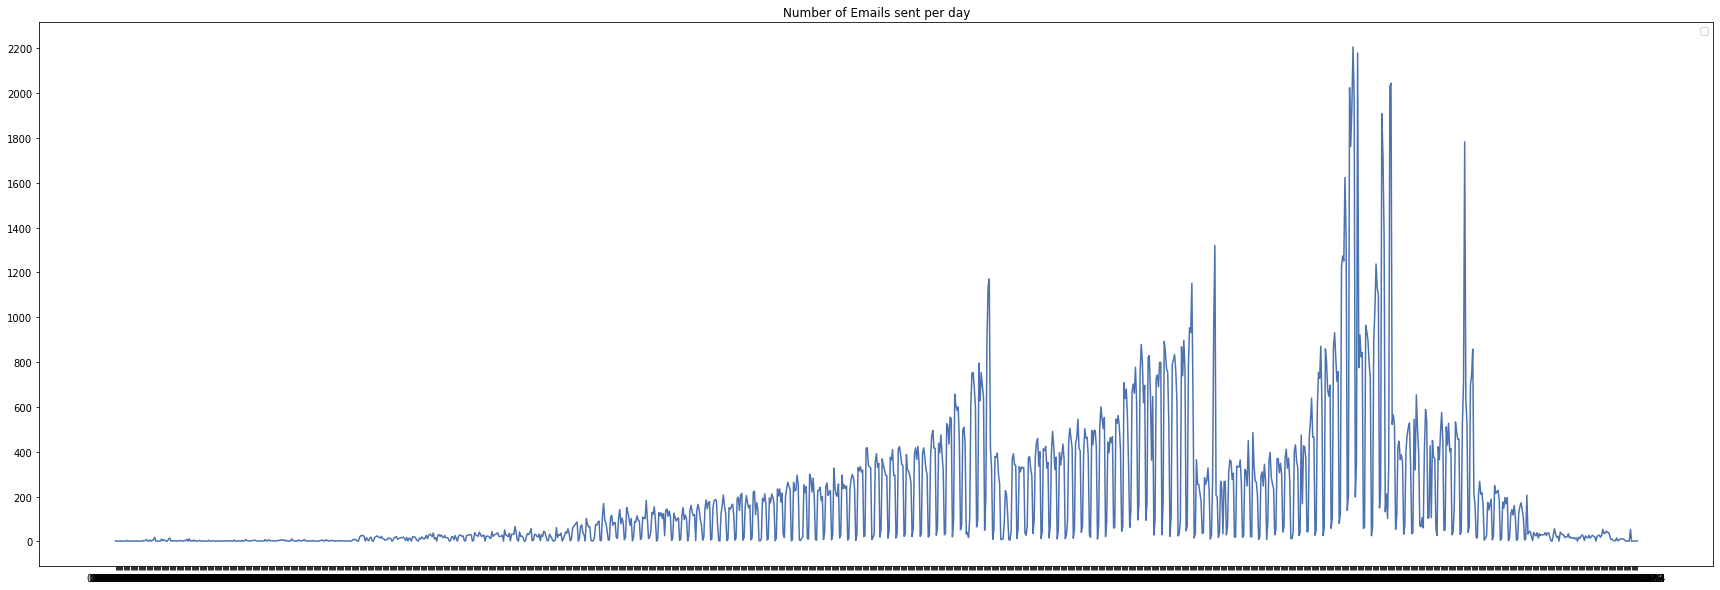

In [67]:
fig = plt.subplots(figsize = (30,10))        #size of plotting figure
x = dfsampledate.date_sent1                   # x & y variables
y = dfsamplemid.num_messages


plt.style.use('seaborn-deep')    #style used



plt.yticks(np.arange(0, max(y),200))   #y-axis tick frequency

plt.title("Number of Emails sent per day")      #title

plt.legend(['Number of E-mails sent'])

plt.plot(x,y)
plt.show()

# New section
Top 10 Email senders

This section treats the greaters number of email each individual sends. The top 10 reults were chosen by their respective e-mail addresses. The query result was then written on a text file, Top 10 E-mail senders, along side with the e-mail count.

In [ ]:
sql2='''
SELECT sender, count(mid) AS message_count
 FROM message
 GROUP BY sender
 ORDER BY message_count
 DESC
 LIMIT 10         */<comment>limits query output to only10 first results*/
 ;
'''
df = open('Top 10 E-mail senders', 'w')

top_10 = cur.execute(sql2)                           #writes query to txt file called Top 10 E-mail senders
for row in top_10:
  df.writelines(str(row))
  df.writelines('\n')
  print(row)
df.close()


Top 10 email senders are Jeff dasovich, J Kamiski, Kay Mann, Sara Shackleton, Tana Jones, Chris Germany, No address (company announcement email), Enron announcement (compny announcement email), Matthew Lenhart, Debra Perlingiere. 2 additonal non-exe email senders : Pete Pavis and Steven J Kean. 

(How to Write to a Text File the Output of for Loop in Python -, n.d.)


(Python Write to File Line by Line, 2018)

In [14]:
top10name = pd.read_sql_query('SELECT sender AS name_sender, count(mid) AS message_num From Message GROUP BY name_sender ORDER BY message_num DESC LIMIT 10', conn)

In [ ]:
top10name

# Top 10 Email senders plotting
The following section plots on a bar chart the top 10 emialers of the firm. Results can be mtched with the text file *Top 10 E-mail senders* for the following section.

A tick frequency (increment of) of the Y axis was set at 200 units, and the ecaxt number of each emailer was displayed at the top of the each bar. 

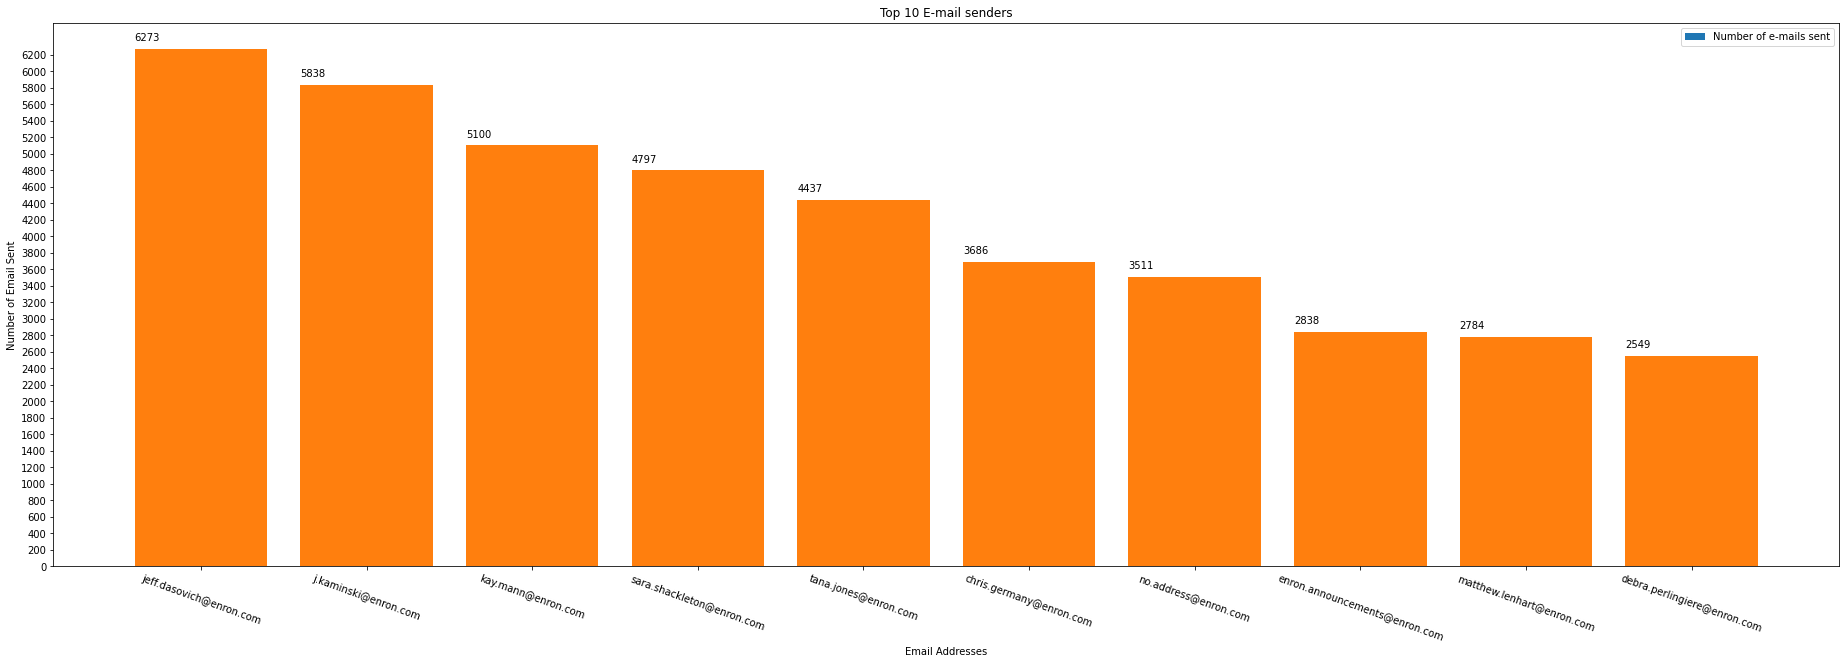

In [16]:
fig = plt.subplots(figsize = (32,10))        #size of plotting figure
x = top10name.name_sender
y = top10name.message_num

plt.style.use('seaborn-deep')

plt.title("Top 10 E-mail senders")
plt.bar(x,y)

plt.yticks(np.arange(0, max(y),200))   #sets range of y-axis, along side with increments (here being an increase of 200 units)

plt.xlabel("Email Addresses")
plt.ylabel("Number of Email Sent")

plt.xticks(rotation= -20)    #rotation of email string at bottom of graph(formatting)

for bar in plt.bar(x,y):                    #displays the exact number of emails at the top of each bar (Matplotlib - Python - How to Show Values on Top of Bar Plot, n.d.)
  yval = bar.get_height()
  plt.text(bar.get_x(), yval + 100, yval)
  
plt.legend(['Number of e-mails sent'])

plt.show()

(Matplotlib - Python - How to Show Values on Top of Bar Plot, n.d.) - exact number appearing on each bar

(Kite, n.d.) - Rotation of X axis graduations

# New section
Top 20 email recievers

This section treats the top 20 email recivers of the company. This was done to find a pattern between the senders and recievers. Those 20 email recivers are saved in the text file *Top 20 E-mail recievers*.

In [ ]:
sql5 ='''
SELECT rvalue, count(rvalue) AS rid_rec
  FROM recipientinfo
  group by rvalue
  ORDER BY rid_rec
  DESC
  LIMIT 20 ;
'''

df1 = open('Top 20 E-mail recivers', 'w')

rows1 = cur.execute(sql5)
for row in rows1:
  df1.writelines(str(row))
  df1.writelines('\n')
  print(row)
df1.close


In [18]:
top20recipient = pd.read_sql_query('SELECT rvalue AS name_reciever, count(rvalue) AS message_num1 From recipientinfo GROUP BY rvalue ORDER BY message_num1 DESC LIMIT 20', conn)

In [ ]:
top20recipient

# Top 20 email recievers plotting

The top 20 email recivers are being plotted on a barchrt, following the same style as the top 10 e-mail senders. 

This section can be useful to dig further on the issue.

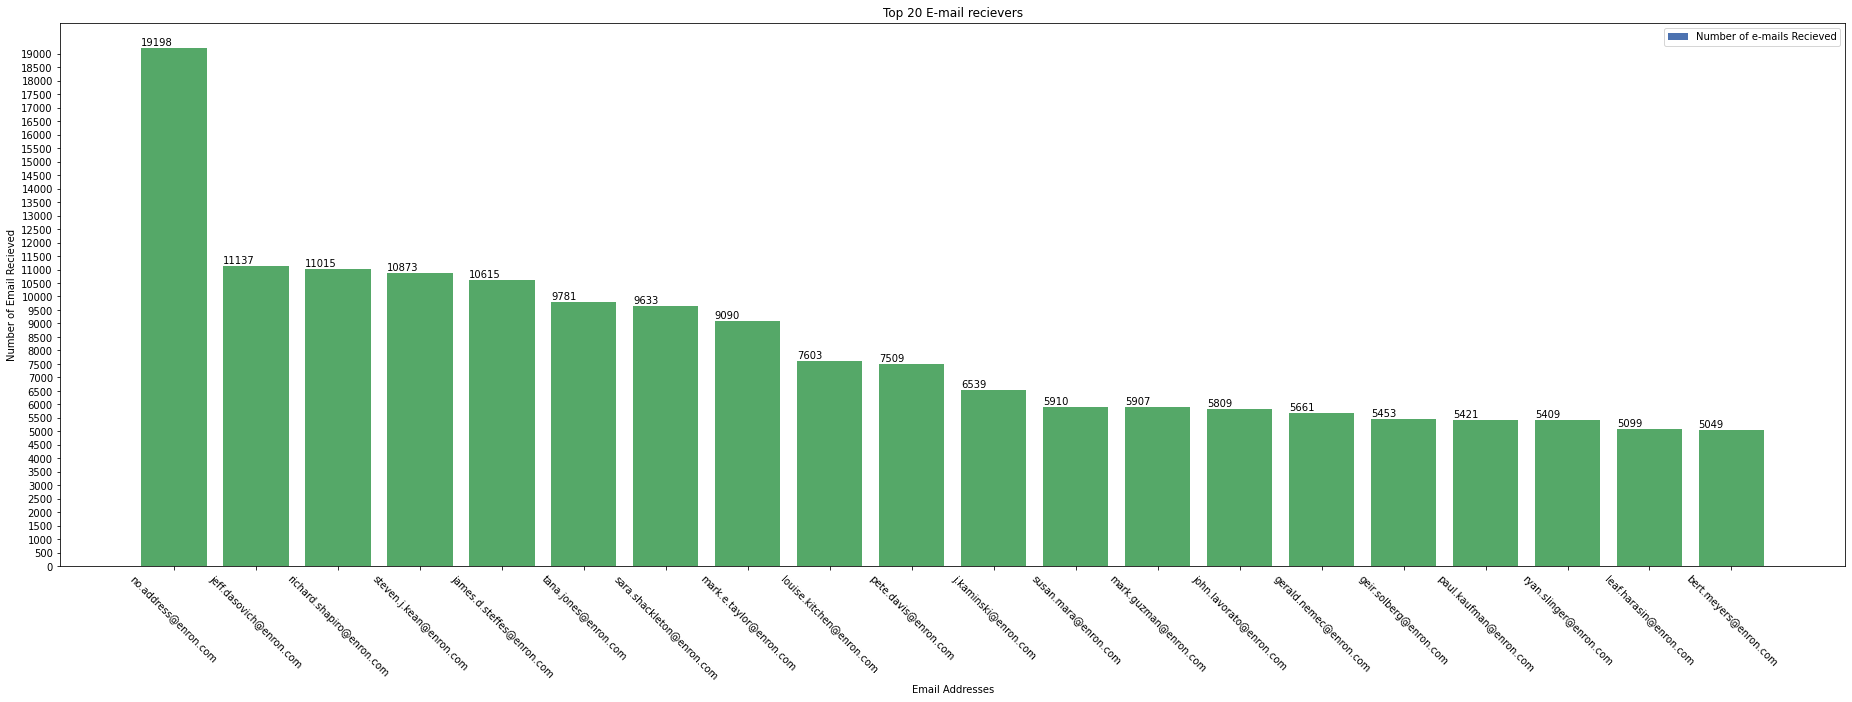

In [23]:
fig = plt.subplots(figsize = (32,10))        #size of plotting figure
x = top20recipient.name_reciever
y = top20recipient.message_num1

plt.style.use('seaborn-deep')

plt.title("Top 20 E-mail recievers")
plt.bar(x,y)

plt.yticks(np.arange(0, max(y),500))   #sets range of y-axis, along side with increments (here being an increase of 200 units)

plt.xlabel("Email Addresses")
plt.ylabel("Number of Email Recieved")

plt.xticks(rotation= -45)    #rotation of email (formatting)

for bar in plt.bar(x,y):                    #displays the exact number of emails at the top of each bar (Matplotlib - Python - How to Show Values on Top of Bar Plot, n.d.)
  yval = bar.get_height()
  plt.text(bar.get_x(), yval + 100, yval)
  
plt.legend(['Number of e-mails Recieved'])

plt.show()

# New section
Side analysis

This section outputs the top 12 e-mail senders of the firm. This is done to target the email addressses of individuals (employees) only, that is not considering the no.address@enron.com' and 
enron.announcements@enron.com addresses, that can be considered as company email addresses  that was used to reach employees, meaning they will naturally have a high email sending rate. The 2 new employee email that now theorically make up the top 10 emailers are the email addresses pete.davis@enron.com and
steven.j.kean@enron.com add up to the list.

Meaning the top 10 **individual** emailers are:

*   jeff.dasovich@enron.com
*   j.kaminski@enron.com
*   kay.mann@enron.com
*   sara.shackleton@enron.com
*   tana.jones@enron.com 
*   chris.germany@enron.com
*   matthew.lenhart@enron.com 
*   debra.perlindiere@enron.com
*   pete.davis@enron.com 
*   steven.j.kean@enron.com




The top 12 emails are saved in the text file *Top 12 E-mail senders*.


 






In [ ]:
sql21='''
SELECT sender, count(mid) AS message_count
 FROM message
 GROUP BY sender
 ORDER BY message_count
 DESC
 LIMIT 12  
 ;
'''
#this query is a slight modification of the one used for the top 10 email sender output,
#where this one outputsthe top 12, taking inminf we are not considering the 2 company emails as individuals

df = open('Top 12 E-mail senders', 'w')

top_10 = cur.execute(sql21)
for row in top_10:
  df.writelines(str(row))
  df.writelines('\n')
  print(row)
df.close()

#Analyis and Discussion
Of the greatest number of emails sent, 6 out of the 10 days happen during the period from 22nd October 2001 to 29th October 2001, respectively the dates 22, 23, 24, 25, 26, 29 of October. Those few dates were days of greatest email transaction during the whole lifetime of the firm. This can be aslo seen on the plot, where around the 20th of October 2001, the graph tarts peaking. This was also the time where the stock price of Enron dropped to around $20.75 after an SEC (U.S. Securities and Exchange Commission) probe on the 22nd of October      (Segal, 2021). Those following days were very busy in email transactions, clearly demonstrated by the graph above. 

The top 10 emailers of the firm can be accessed through the text file *Top 10 E-mail senders* and also they are represented on the barchart above. For this section the email addresses no.address@enron.com and enron.announcements@enron.com will not be greatly considered, as they are emails greatly used to send announcements. Taking the results for the top 10 email recivers (individuals only) and comparing them to the top email recievers 3 addresses appear in the top 10 of both lists, which are:

*   jeff.dasovich@enron.com
*   sara.shackleton@enron.com
*   tana.jones@enron.com

where jeff.dasovich@enron.com was the top email sender, and second top email reciever (however, top individual to recieve emails as the top email reciver was no.address@enron.com)

Those email addresses were the ones who sent the most emails, an also recieved the most of them during the runtime of the firm.

The findings suggest that those individuals used their company email addresses a lot.

It can be asumed that the people involved in the fraudulent transactions were using the company's email servers to communicate to their accomplices, and leading to the date of the 25th of October 2001, where the firm recorded the higest email transaction rate ever (2207 emails sent on that day), just shy of 3 days after the SEC investigation announcement towards Enron. This can be interpreted as a period where the firm was very much on nerve, on the brink of bankrupcy and possibly trying to find a solution.







# Conclusion

The data showed the email transactions between the employees. It can be noted that several email transactions occured between the 22th of October 2001 to the 29th of October 2001, possibly due to the falling stock prices and SEC investigation opening. The email trasnaction rates were also analysed on this revealing usage patterns that needs more investigation, where time of email transactions could also have been taken into consideration to analyse more concrete email sending patterns, and see whether emailswere sent during business hours or not which could lead the fraudulent operations to be uncovered. 

# References:
How to write to a text file the output of for loop in python -. (n.d.). ProjectPro. Retrieved May 28, 2022, from https://www.projectpro.io/recipes/write-text-file-output-of-for-loop

Kite. (n.d.). Www.adamsmith.haus. Retrieved May 28, 2022, from https://www.adamsmith.haus/python/answers/how-to-rotate-axis-labels-in-matplotlib-in-python

matplotlib - python - how to show values on top of bar plot. (n.d.). Stack Overflow. https://stackoverflow.com/questions/53066633/python-how-to-show-values-on-top-of-bar-plot

Python Write To File Line By Line. (2018, December 24). /Decoding/Devops. https://www.decodingdevops.com/python-write-to-file-line-by-line/

Segal, T. (2021, November 26). Enron scandal: The fall of a Wall Street darling. Investopedia. https://www.investopedia.com/updates/enron-scandal-summary/